In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [71]:
#ЗАВДАННЯ 1
df = pd.read_csv("shopping_trends.csv", encoding="latin1")
df.head(5)

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Payment Method,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Preferred Payment Method,Frequency of Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Credit Card,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Bank Transfer,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Cash,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,PayPal,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Cash,Free Shipping,Yes,Yes,31,PayPal,Annually


In [15]:
df.shape

(3900, 19)

In [76]:
df = df.rename(columns={'Customer ID':'customer_id', 'Age':'age', 'Gender':'gender', 'Item Purchased':'item_purchased', 'Category':'category', 'Purchase Amount (USD)':'purchase_amount', 'Location':'location', 'Size':'size', 'Color':'color', 'Season':'season', 'Review Rating':'review_rating', 'Subscription Status':'subscription_status', 'Payment Method':'payment_method', 'Shipping Type':'shipping_type', 'Discount Applied':'discount_applied', 'Promo Code Used':'promo_code_used', 'Previous Purchases':'previous_purchases', 'Preferred Payment Method':'preferred_payment_method', 'Frequency of Purchases':'frequency_of_purchases'})
df = df.replace("-", np.nan)
df = df.apply(lambda col: col.fillna(col.mean()) if np.issubdtype(col.dtype, np.number) else col)
df.isna().sum()

customer_id                 0
age                         0
gender                      0
item_purchased              0
category                    0
purchase_amount             0
location                    0
size                        0
color                       0
season                      0
review_rating               0
subscription_status         0
payment_method              0
shipping_type               0
discount_applied            0
promo_code_used             0
previous_purchases          0
preferred_payment_method    0
frequency_of_purchases      0
dtype: int64

In [33]:
df.head(5)

,customer_id,age,gender,item_purchased,category,purchase_amount,location,size,color,season,review_rating,subscription_status,payment_method,shipping_type,discount_applied,promo_code_used,previous_purchases,preferred_payment_method,frequency_of_purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Credit Card,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Bank Transfer,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Cash,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,PayPal,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Cash,Free Shipping,Yes,Yes,31,PayPal,Annually


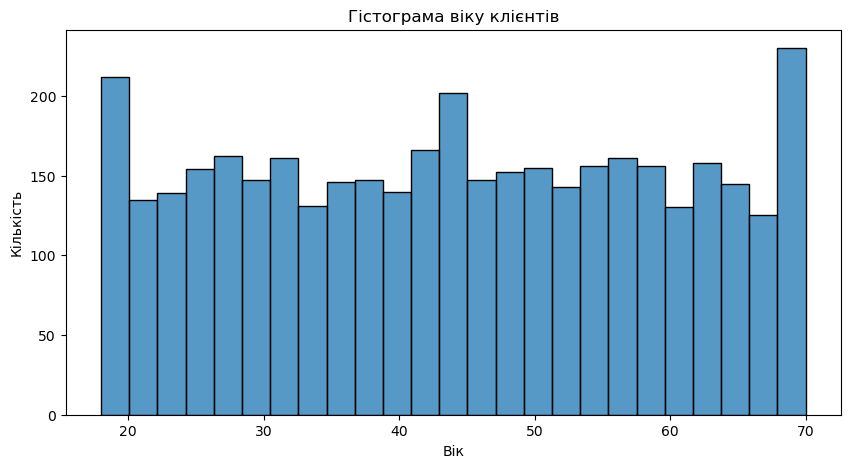

In [18]:
#1. Гістограма віку (age): Побудуйте гістограму віку клієнтів, використовуючи Seaborn.
plt.figure(figsize=(10, 5))
sns.histplot(data=df, x='age', bins=25)  # bins - кількість корзин, kde - включення нормованої оцінки щільності
plt.title("Гістограма віку клієнтів")
plt.xlabel('Вік')
plt.ylabel('Кількість')
plt.show()

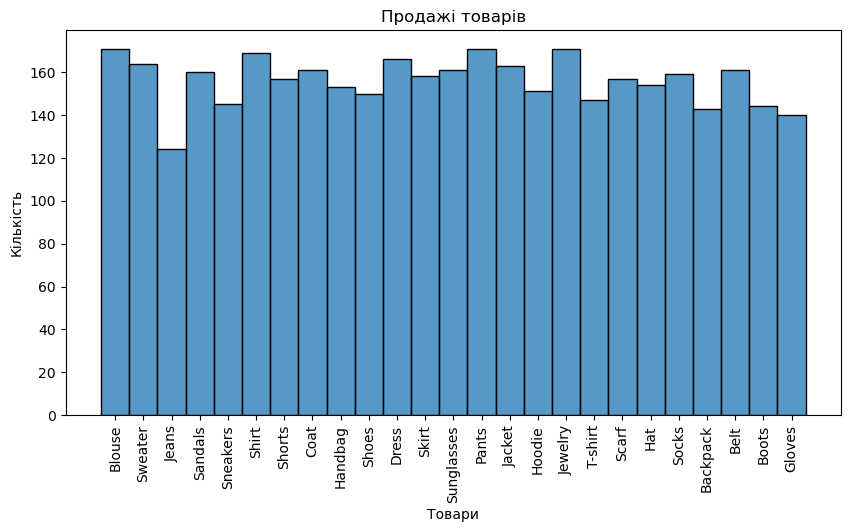

In [19]:
#2. Порівняння розподілу покупок за статтею (item_purchased):
#Створіть стовпчасту діаграму або графік розподілу, щоб порівняти, які
#товари покупають клієнти найчастіше.
plt.figure(figsize=(10, 5))
sns.histplot(data=df, x='item_purchased', bins=25)
plt.title("Продажі товарів")
plt.xlabel('Товари')
plt.xticks(rotation=90)
plt.ylabel('Кількість')
plt.show()

Text(0, 0.5, 'Кількість покупок')

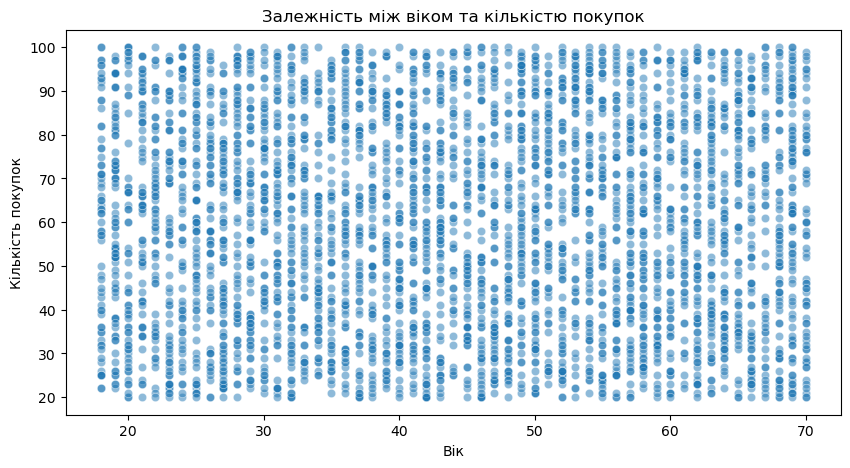

In [70]:
#3. Залежність між віком та сумою покупок (purchase_amount):
#Використовуйте scatter plot, щоб візуалізувати залежність між віком та
#сумою покупок.
plt.figure(figsize=(10, 5))
sns.scatterplot(data=df, x='age', y='purchase_amount', alpha=0.5)
plt.title('Залежність між віком та кількістю покупок')
plt.xlabel('Вік')
plt.ylabel('Кількість покупок')

Text(0, 0.5, 'Оцінки')

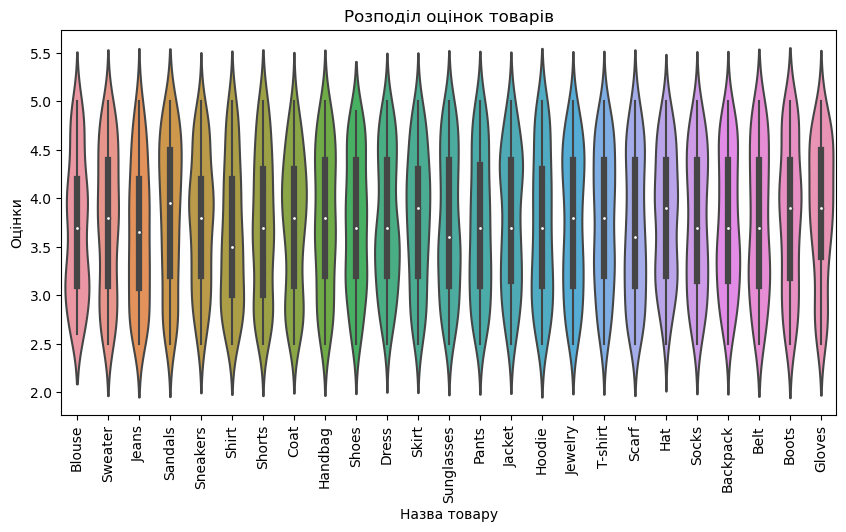

In [21]:
#4. Графік розподілу оцінок товарів (review_rating):
#Побудуйте графік розподілу оцінок товарів для оцінки якості
plt.figure(figsize=(10, 5))
sns.violinplot(x='item_purchased', y='review_rating', data=df)
plt.title('Розподіл оцінок товарів')
plt.xlabel('Назва товару')
plt.xticks(rotation=90)
plt.ylabel('Оцінки')

Text(0, 0.5, 'Стать')

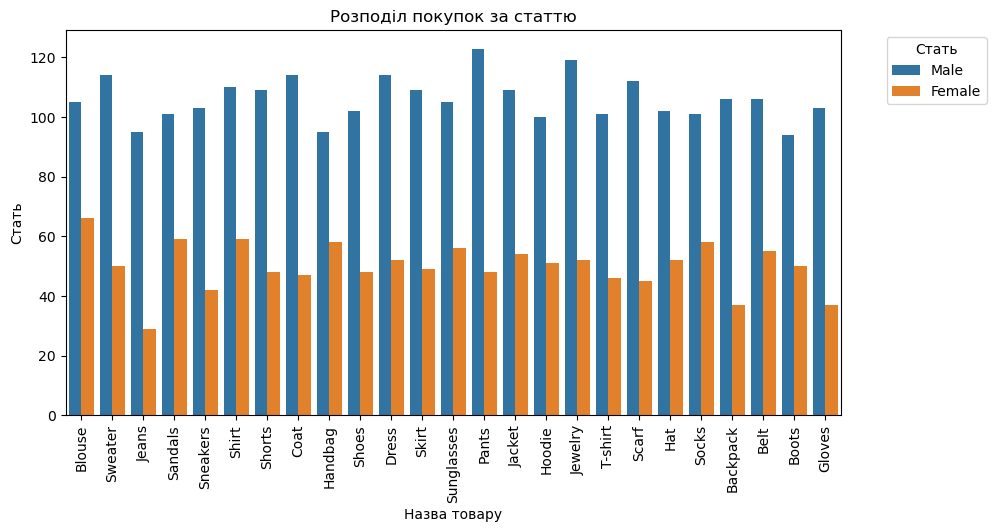

In [65]:
#5. Категоріальна діаграма для статі (gender):
#Створіть категоріальну діаграму, щоб відобразити розподіл покупок за
#статтею.
plt.figure(figsize=(10, 5))
sns.countplot(x='item_purchased', hue='gender', data=df)
plt.title('Розподіл покупок за статтю')
plt.legend(title='Стать', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xlabel('Назва товару')
plt.xticks(rotation=90)
plt.ylabel('Стать')

Text(0, 0.5, 'Кількість покупок')

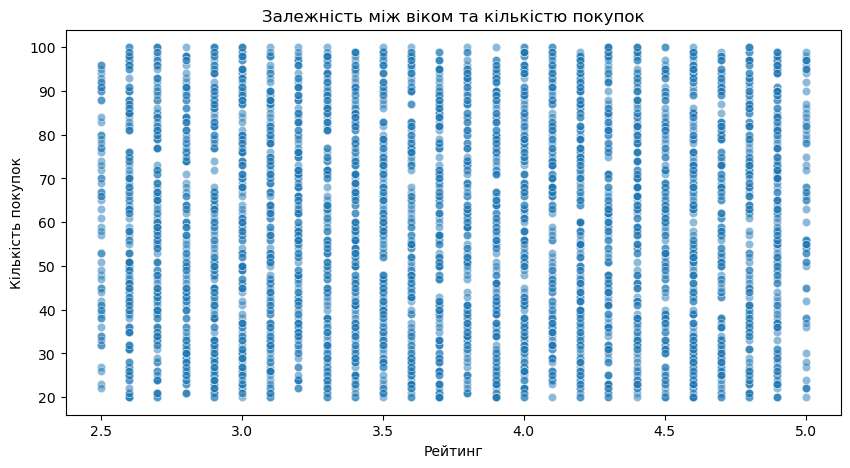

In [67]:
#6. Залежність між рейтингом і сумою покупок (review_rating і purchase_amount):
#Вивчіть, чи існує зв'язок між рейтингом товару і сумою покупок за
#допомогою scatter plot.
plt.figure(figsize=(10, 5))
sns.scatterplot(data=df, x='review_rating', y='purchase_amount', alpha=0.5)
plt.title('Залежність між віком та кількістю покупок')
plt.xlabel('Рейтинг')
plt.ylabel('Кількість покупок')

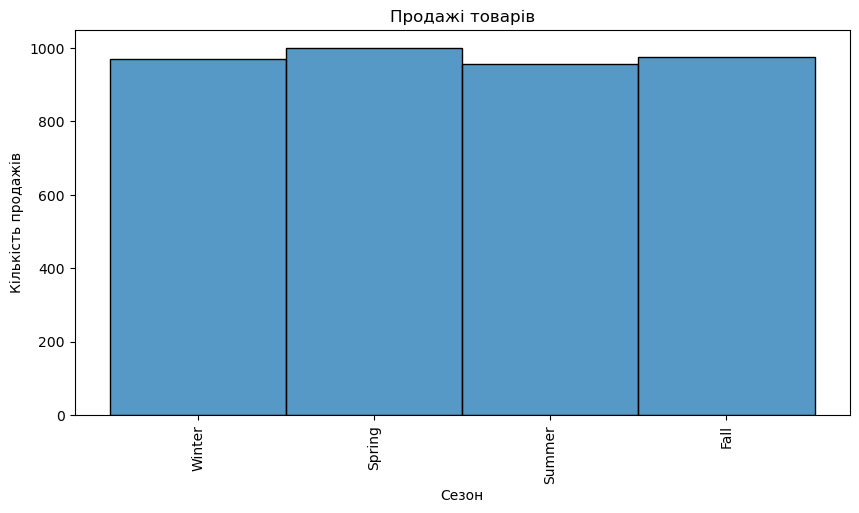

In [31]:
#7. Сезонність покупок (season):
#Побудуйте стовпчату діаграму, яка відображає, в який сезон клієнти
#роблять найбільше покупок.
plt.figure(figsize=(10, 5))
sns.histplot(data=df, x='season', bins=25)
plt.title("Продажі товарів")
plt.xlabel('Сезон')
plt.xticks(rotation=90)
plt.ylabel('Кількість продажів')
plt.show()

Text(0, 0.5, 'Кількість')

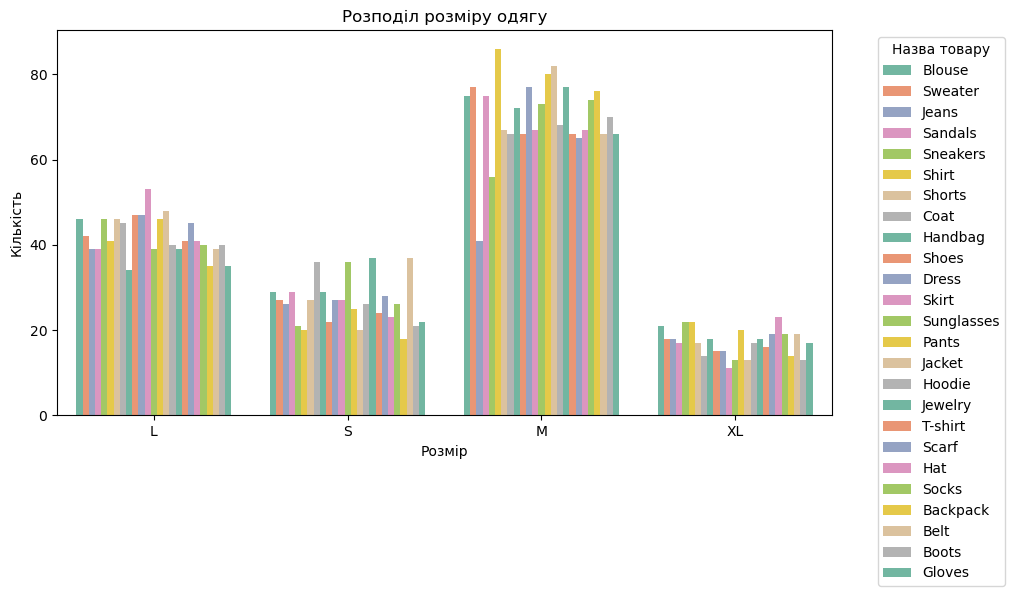

In [46]:
#8. Графік розподілу розмірів одягу (size):
#Створіть графік розподілу розмірів одягу, щоб визначити популярність
#різних розмірів.
plt.figure(figsize=(10, 5))
sns.countplot(x='size', hue='item_purchased', data=df, palette='Set2')
plt.title('Розподіл розміру одягу')
plt.legend(title='Назва товару', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xlabel('Розмір')
plt.ylabel('Кількість')

Text(0, 0.5, 'Кількість')

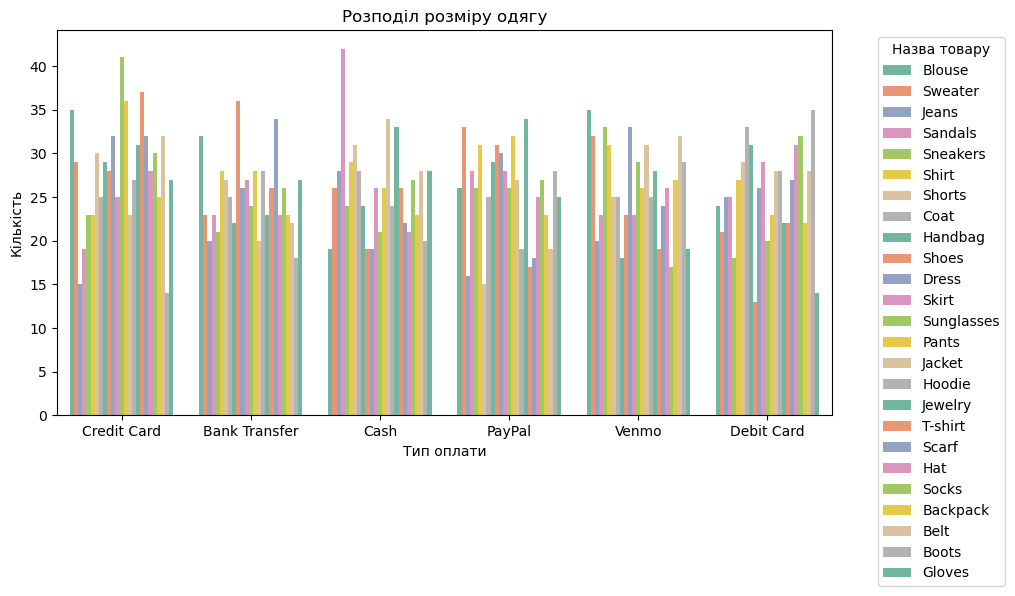

In [51]:
#9. Кількість покупок відносно типу оплати (payment_method):
#Порівняйте, скільки покупок робиться за різними методами оплати за
#допомогою стовпчатої діаграми.
plt.figure(figsize=(10, 5))
sns.countplot(x='payment_method', hue='item_purchased', data=df, palette='Set2')
plt.title('Розподіл розміру одягу')
plt.legend(title='Назва товару', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xlabel('Тип оплати')
plt.ylabel('Кількість')

Text(0, 0.5, 'Кількість покупок')

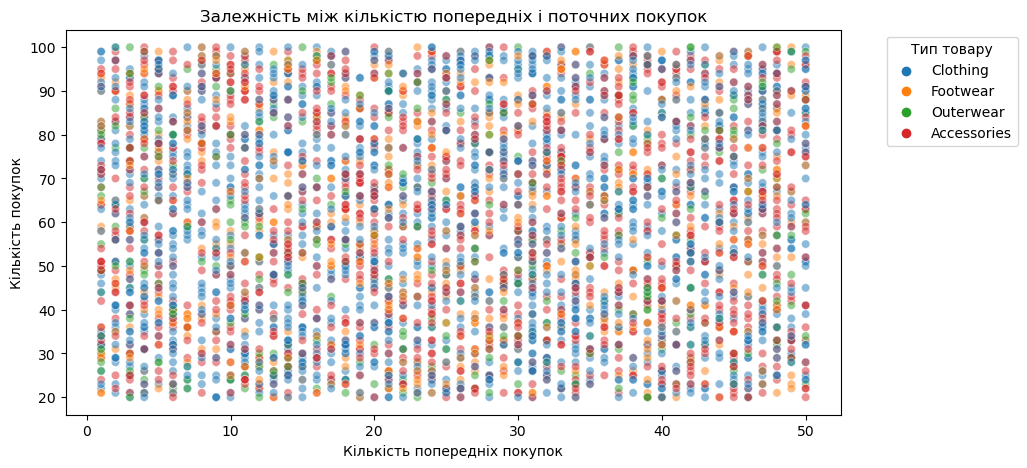

In [77]:
#10.Залежність між кількістю попередніх покупок (previous_purchases) і
#сумою поточної покупки (purchase_amount):
#Створіть scatter plot для визначення, чи існує зв'язок між кількістю
#попередніх покупок та сумою поточної покупки.
plt.figure(figsize=(10, 5))
sns.scatterplot(data=df, x='previous_purchases', y='purchase_amount', hue='category', alpha=0.5)
plt.title('Залежність між кількістю попередніх і поточних покупок')
plt.legend(title='Тип товару', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xlabel('Кількість попередніх покупок')
plt.ylabel('Кількість покупок')

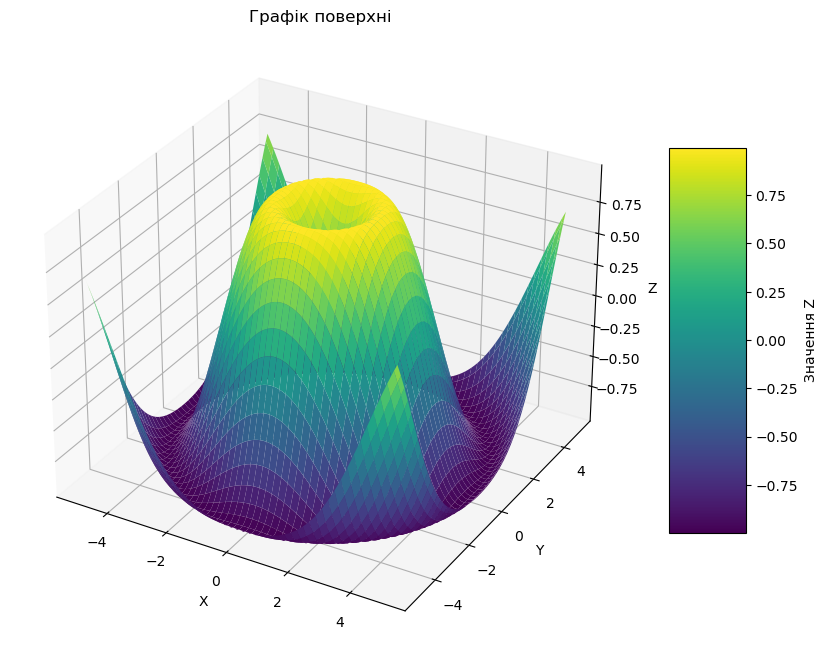

In [85]:
#ЗАВДАННЯ 2
#Побудуйте графік поверхні (3D surface plot) для візуалізації залежності
#між трьома числовими змінними з використанням бібліотеки Seaborn.
#Налаштуйте відображення графіка, включаючи назву графіку, підписи
#осей і інші необхідні параметри для кращого розуміння візуалізації.
#Додайте кольорову легенду.
#𝑧 = 𝑠𝑖𝑛 √(𝑥^2 + 𝑦^2), 𝑥 ∈ [−5; 5], 𝑦 ∈ [−5; 5]
x = np.linspace(-5, 5, 100)
y = np.linspace(-5, 5, 100)
x, y = np.meshgrid(x, y)
z = np.sin(np.sqrt(x**2 + y**2))
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_surface(x, y, z, cmap='viridis')
ax.set_title('Графік поверхні')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
fig.colorbar(surf, shrink=0.5, aspect=5, label='Значення Z')
plt.show()


In [92]:
#Завдання 3
#Побудуйте графік теплової поверхні для візуалізації залежності між
#двома або більше числовими змінними на основі матриці даних,
#використовуючи бібліотеку Seaborn.
#Опис завдання:
#Згенеруйте дані, які будуть представлені у вигляді матриці. Ця матриця
#може містить значення залежності між двома або більше числовими
#змінними.
#Використовуючи бібліотеку Seaborn, побудуйте графік теплової поверхні
#(heatmap), де кольори відображають значення відповідних елементів
#матриці.
#Налаштуйте відображення графіку, включаючи назву графіку, підписи
#осей і інші необхідні параметри для кращого розуміння візуалізації.
matrix = np.random.rand(10, 10)
print(matrix)

[[0.89930996 0.9069801  0.7795776  0.79810191 0.51123489 0.24667937
  0.45351515 0.02486221 0.7148629  0.06727413]
 [0.70979585 0.35853617 0.27130963 0.70368652 0.37694491 0.35682237
  0.86123191 0.45749036 0.26542394 0.89985976]
 [0.41787387 0.18381344 0.63525366 0.34661938 0.39403621 0.11870209
  0.14749371 0.46153179 0.96878086 0.8040144 ]
 [0.53211884 0.86892634 0.86746645 0.68580829 0.26352364 0.0083196
  0.36277467 0.34140977 0.18142325 0.52929096]
 [0.16658828 0.01495068 0.95350094 0.59415344 0.6550095  0.76544094
  0.19799437 0.76575032 0.07151119 0.12794839]
 [0.50589397 0.71622555 0.9154245  0.35298762 0.34503511 0.42873602
  0.26681673 0.80337426 0.15430176 0.27237741]
 [0.99892455 0.96370059 0.97301041 0.56041797 0.88358432 0.2928559
  0.53289757 0.24683793 0.03946495 0.93203501]
 [0.09790583 0.09818621 0.91181686 0.9060326  0.99898112 0.69963179
  0.81909109 0.67945881 0.8881712  0.24242224]
 [0.01114012 0.0741515  0.37129092 0.9387949  0.05565789 0.56538706
  0.11136099 0

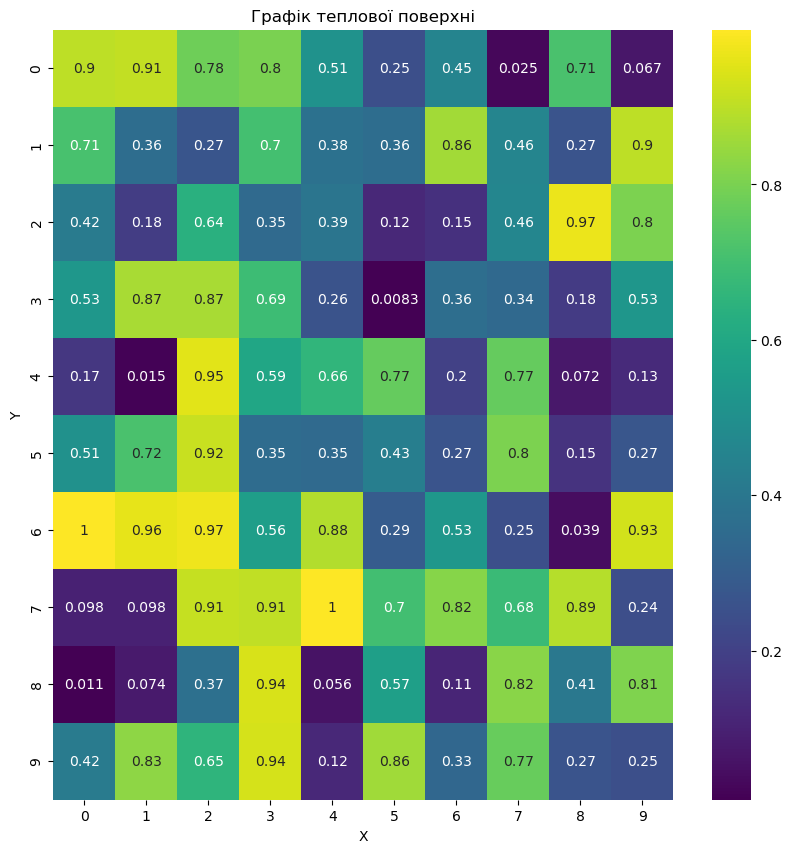

In [93]:
plt.figure(figsize=(10, 10))
sns.heatmap(matrix, annot=True, cmap='viridis')
plt.title('Графік теплової поверхні')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()